## Measuring the Success of NBA Players According to their Years Spent in College
### by Esteban De la Vega
The goal of this project is to analyze the correlation between a basketball player’s time in college and his performance at a professional level. Prior to a collective bargaining agreement in 2005, high schoolers, granted they were talented enough, could be drafted into the NBA without having been enrolled in college or without being a year removed from high school graduation. Thereon, there has been a recent trend of players who play one year in college and then transition into the NBA. This project will assess whether preparing for a longer unpaid period leads to further  success in a player's professional career.

This project compares two data sources: all the NBA drafts begining in 1988 onwards and All-NBA team selections dating back to 1988. It will only take into account first-round draft selections and will count all All-NBA selections even if a player has multiple ones.

In [35]:
import sys                             
import pandas as pd                    
import matplotlib.pyplot as plt          
import datetime as dt                  
import numpy as np                     
import html5lib
from bs4 import BeautifulSoup 
import seaborn.apionly as sns          
from pandas.io import data, wb         


from plotly.offline import iplot, iplot_mpl  
import plotly.graph_objs as go               
import plotly                                
import cufflinks as cf                       
cf.set_config_file(offline=True, offline_show_link=False)


%matplotlib inline             
plotly.offline.init_notebook_mode()

print('Python version:', sys.version)
print('Pandas version: ', pd.__version__)
print('Plotly version: ', plotly.__version__)
print('Today: ', dt.date.today())

Python version: 3.5.1 |Anaconda 2.4.1 (x86_64)| (default, Dec  7 2015, 11:24:55) 
[GCC 4.2.1 (Apple Inc. build 5577)]
Pandas version:  0.17.1
Plotly version:  1.9.10
Today:  2016-05-08


Players selected into All-NBA teams:

By using the read_html function of html5lib, we are able to read the data from Basketball-Reference.com exactly as it is displayed on the website. We then convert the data into a pd.DataFrame and adjust the columns and shape up the variables.

In [4]:
# Code  reading allnba team selections since the 1988-1989 season.
url = 'http://www.basketball-reference.com/awards/all_league.html'
allnba = pd.read_html(url)
allnba = allnba[0]
allnba.columns = ['Year','League','All-NBA Team','Player1','Player2','Player3','Player4','Player5']
allnba = allnba.drop('League',1)
allnba = allnba.head(106)
allnba



,Year,All-NBA Team,Player1,Player2,Player3,Player4,Player5
0,2014-15,1st,Marc Gasol C,Anthony Davis F,LeBron James F,James Harden G,Stephen Curry G
1,2014-15,2nd,Pau Gasol C,DeMarcus Cousins C,LaMarcus Aldridge F,Chris Paul G,Russell Westbrook G
2,2014-15,3rd,DeAndre Jordan C,Tim Duncan F,Blake Griffin F,Kyrie Irving G,Klay Thompson G
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-14,1st,Joakim Noah C,LeBron James F,Kevin Durant F,James Harden G,Chris Paul G
5,2013-14,2nd,Dwight Howard C,Blake Griffin F,Kevin Love F,Stephen Curry G,Tony Parker G
6,2013-14,3rd,Al Jefferson C,LaMarcus Aldridge F,Paul George F,Damian Lillard G,Goran Dragic G
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2012-13,1st,Tim Duncan C,LeBron James F,Kevin Durant F,Kobe Bryant G,Chris Paul G
9,2012-13,2nd,Marc Gasol C,Blake Griffin F,Carmelo Anthony F,Russell Westbrook G,Tony Parker G


In [9]:
# Combine all 'Player' columns into one and remove extra information at the end of the names such as C,F, and G
allnbaM = pd.melt(allnba, id_vars=['All-NBA Team'],value_vars=['Player1','Player2','Player3','Player4','Player5'],
                 value_name='Player')
allnbaM['Player'] = allnbaM['Player'].str.replace("(C|F|G)\s*$", "")
allnbaM['Player'] = allnbaM['Player'].str.strip()
allnbaM = allnbaM.drop('variable',1)
allnbaM.tail()

,All-NBA Team,Player
525,2nd,John Stockton
526,3rd,Joe Dumars
527,NaN,NaN
528,1st,Michael Jordan
529,2nd,Kevin Johnson


Players Drafted:

Having read the All-NBA teams from Basketball-Reference.com, we do the same with the draft data from RealGM.com. The data is on multiple pages so we develop a loop that will read every page based on its url's distinguishable ending. Afterward we us the pd.concat function to convert the lists returned by the loop into a DF.


In [38]:
# Code for reading players drafted in every first round of the nba draft since 1989
draft = []
for number in range (27): 
    Year = str(2015 - (number))
    url1 = 'http://basketball.realgm.com/nba/draft/past_drafts/' 
    thisdraft = pd.read_html(url1 + Year)[0]
    print('Number:', number)
    print('Type: ', type(thisdraft))
    print(thisdraft.head())
    draft.append(thisdraft)

Number: 0
Type:  <class 'pandas.core.frame.DataFrame'>
   Pick              Player Team Draft Trades Pos    HT   WT  Age  YOS  \
0     1  Karl-Anthony Towns  MIN          NaN   C   7-0  244   19    0   
1     2    D'Angelo Russell  LAL          NaN  SG   6-5  195   19    0   
2     3       Jahlil Okafor  PHL          NaN   C  6-11  275   19    0   
3     4  Kristaps Porzingis  NYK          NaN  FC   7-3  240   19    0   
4     5       Mario Hezonja  ORL          NaN  SG   6-8  218   20    0   

               Pre-Draft Team       Class                         Nationality  
0                    Kentucky        Fr *  United States / Dominican Republic  
1                  Ohio State        Fr *                       United States  
2                        Duke        Fr *                       United States  
3  Baloncesto Sevilla (Spain)  1995 DOB *                              Latvia  
4     FC Barcelona II (Spain)  1995 DOB *                             Croatia  
Number: 1
Type:  <cl

In [10]:
# Code for placing all players drafted in the first round into a pandas dataframe
alldrafts = pd.concat(draft)
alldrafts = alldrafts.drop('Team',1)
alldrafts.drop(alldrafts.columns[[2]], axis=1, inplace=True)
alldrafts.loc[alldrafts.Class.str.contains("DOB"), "Class"] = "N/A"
alldrafts['Class'] = alldrafts['Class'].str.replace("*", "")
alldrafts['Class'] = alldrafts['Class'].str.strip()

alldrafts.tail(10)

,Pick,Player,Pos,HT,WT,Age,YOS,Pre-Draft Team,Class,Nationality
17,18,B.J. Armstrong,G,6-2,175,21,11,Iowa,Sr,United States
18,19,Kenny Payne,F,6-8,195,22,4,Louisville,Sr,United States
19,20,Jeff Sanders,F,6-8,225,23,5,Georgia Southern,Sr,United States
20,21,Blue Edwards,SG,6-4,200,23,10,East Carolina,Sr,United States
21,22,Byron Irvin,G,6-5,190,22,4,Missouri,Sr,United States
22,23,Roy Marble,GF,6-6,190,22,3,Iowa,Sr,United States
23,24,Anthony Cook,FC,6-9,205,22,5,Arizona,Sr,United States
24,25,John Morton,G,6-3,180,22,6,Seton Hall,Sr,United States
25,26,Vlade Divac,C,7-1,260,21,16,KK Partizan (Serbia),N/A,Serbia
26,27,Kenny Battle,SF,6-6,210,24,4,Illinois,Sr,United States


In [30]:
# Get means of draft positions based on college class
print('Avergage draft position for freshmen in the first round is:',
      alldrafts[alldrafts['Class'].str.contains('Fr')]['Pick'].mean())
print('Avergage draft position for Sophomores in the first round is:',
      alldrafts[alldrafts['Class'].str.contains('So')]['Pick'].mean())
print('Avergage draft position for Juniors in the first round is:',
      alldrafts[alldrafts['Class'].str.contains('Jr')]['Pick'].mean())
print('Avergage draft position for Seniors in the first round is:',
      alldrafts[alldrafts['Class'].str.contains('Sr')]['Pick'].mean())
print('Avergage draft position for those who didnt attend college in the first round is:',
      alldrafts[alldrafts['Class'].str.contains('N/A')]['Pick'].mean())

Avergage draft position for freshmen in the first round is: 11.202127659574469
Avergage draft position for Sophomores in the first round is: 12.453781512605042
Avergage draft position for Juniors in the first round is: 13.33108108108108
Avergage draft position for Seniors in the first round is: 17.15771812080537
Avergage draft position for those who didnt attend college in the first round is: 16.875


(0, 35.0)

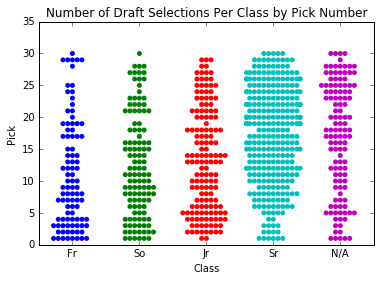

In [33]:
# Gives us the distribution of selections by class ordered by pick number
# But first we must reorder the classes by Fr, So, Jr, Sr, N/A
Classes = ['Fr', 'So', 'Jr', 'Sr', 'N/A']
mapping = {Class: i for i, Class in enumerate(Classes)}
key = alldrafts['Class'].map(mapping)
alldrafts_in_order = alldrafts.iloc[key.argsort()]

ax = sns.swarmplot(x="Class", y="Pick", data=alldrafts_in_order)
ax.set_title('Number of Draft Selections Per Class by Pick Number')
ax.set_ylim(0)

Fr      94
So     119
Jr     148
Sr     298
N/A    120
dtype: int64


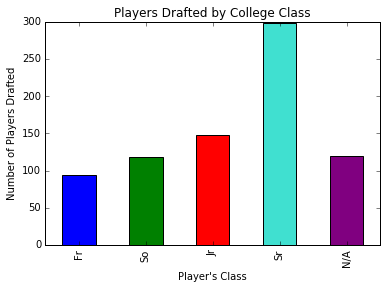

In [34]:
#code for number of players drafted in each class => Seniors are  most prevalent followed by juniors
clAss = ['Fr','So','Jr','Sr','N/A']
alldraftsC = alldrafts.copy()
grades = []
for x in  clAss:
    grades.append(x)
    alldraftsC[x] = alldraftsC['Class'].str.contains(x)*1
classes = alldraftsC[grades]
classes_counts = classes.sum()

print(classes_counts)

fig, ax = plt.subplots()
classes_counts.plot(ax=ax, legend=False, kind = 'bar', color=['blue','green','red','turquoise','purple'])
ax.set_xlabel("Player's Class")
ax.set_ylabel('Number of Players Drafted')
ax.set_title('Players Drafted by College Class')

Merge both data tables:

In [25]:
# Merge on Player (Add an 'All-NBA Team' column)
draftallnba = pd.merge(alldrafts, allnbaM,   
                 how='left',         
                 on='Player')
draftallnba.tail(30)

,Pick,Player,Pos,HT,WT,Age,YOS,Pre-Draft Team,Class,Nationality,All-NBA Team
939,4,Glen Rice,SF,6-8,228,22,15,Michigan,Sr,United States,2nd
940,5,J.R. Reid,PF,6-9,247,21,11,North Carolina,Jr,United States,NaN
941,6,Stacey King,PF,6-11,250,22,10,Oklahoma,Sr,United States,NaN
942,7,George McCloud,SF,6-6,205,22,13,Florida State,Sr,United States,NaN
943,8,Randy White,PF,6-8,240,21,6,Louisiana Tech,Sr,United States,NaN
944,9,Tom Hammonds,PF,6-9,215,22,13,Georgia Tech,Sr,United States,NaN
945,10,Pooh Richardson,PG,6-1,180,23,11,UCLA,Sr,United States,NaN
946,11,Nick Anderson,GF,6-6,228,21,14,Illinois,So,United States,NaN
947,12,Mookie Blaylock,PG,6-1,190,22,13,Oklahoma,Sr,United States,NaN
948,13,Michael Smith,F,6-10,225,24,5,Brigham Young,Sr,United States,NaN


In [26]:
# Count the number of All-NBA selections by time spent in college
counts = draftallnba['All-NBA Team'].groupby([draftallnba['Class'], draftallnba['All-NBA Team']]).count()
counts = pd.DataFrame(counts)
counts.columns = ['Number of Selections']
counts = counts.unstack(level=0)
counts = counts['Number of Selections']
counts = counts[['Fr', 'So', 'Jr', 'Sr', 'N/A']]
countsT = counts.T
countsT['Total'] = [24,51,45,56,87]
counts = countsT.transpose()
counts


Class,Fr,So,Jr,Sr,N/A
All-NBA Team,,,,,
1st,7,15,12,19,36
2nd,9,19,12,23,30
3rd,8,17,21,14,21
Total,24,51,45,56,87


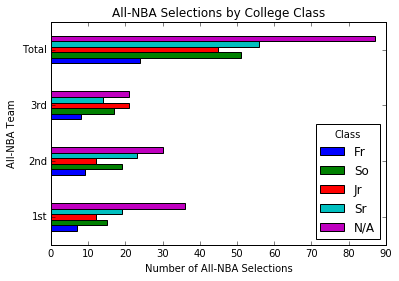

In [28]:
# Plot All-NBA selections by time spent in college
fig, ax = plt.subplots()
counts.plot(ax=ax, legend=True, kind = 'barh')
ax.set_xlabel('Number of All-NBA Selections')
ax.set_title('All-NBA Selections by College Class')

Ultimately, while the results show us that freshmen are drafted with higher priority picks than the rest, closely followed by sophomores, seniors are the most commonly drafted players in the first round. Nevertheless, it is those who decided to jump straight to the NBA from high school or who played a year or more abroad before joining the NBA that have garnered the highest amount of All-NBA honors.